<a href="https://colab.research.google.com/github/Sinnick4r/LaboDatos2025/blob/main/2do_parcial_Labo_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SEGUNDO PARCIAL: LABORATORIO DE RECOPILACIÓN DE DATOS

**ACTIVIDAD GRUPAL:** Entre 5 y 6 participantes. Entregar un trabajo por equipo en la plataforma classroom.

**EVALUACION:** Entrega de un solo trabajo escrito grupal más defensa oral grupal en
la clase. Importante: los alumnos que NO asistan a la instancia de defensa oral grupal, deberán presentarse en la etapa de recuperación.

**CONTENIDO DEL TRABAJO:** Deberá contener: introducción, desarrollo,
conclusión, máximo hasta 5 carillas por grupo.

**FECHA DE ENTREGA Y DEFENSA ORAL GRUPAL: 25/6/2025.**

**CONSIGNA GENERAL (común a todos los grupos)**

* Descargar el archivo llamado “BBDD_evaluacion.xlsx” en Python y guardarlo en un
data frame llamado “tp”.
* Efectuar un preprocesamiento de los datos.

**GRUPO 5: (Silva, Vargas, Palacio, Cineiro, Lencina, Baliotta)**

1.   Seleccionar la variable: birth_mortal
2.   Renombrar la columna “birth_mortal” por “Indice_Mortalidad”
3.   Reemplazar los 3 primeros registros de la variable renombrada según la sig.
fórmula: 2*max(Indice_Mortalidad)
4.  Verificar la existencia de outliers, creando una nueva columna llamada
“Outliers” que clasifique los valores atípicos como: “Upper_bound”,
“lower_bound”, “Normal.
5.  Crear una nueva columna llamada “Región” que contenga 4 zonas: Norte,
Cuyo, Central, Patagónica. Asignar a cada región las provincias
correspondientes. Graficar.
6.  Agrupar los datos de la variable renombrada en función de las 4 regiones.
Graficar.
7.  Crear una variable llamada “Prov-Reg” que “una” el nombre de la provincia
y de la Región.
8.  Crear un ratio que relacione el valor total de la variable renombrada de cada
región en relación a las provincias correspondientes. Graficar.
9.  Filtrar los datos, mostrando los resultados de las regiones: Central y
Patagónica.
10.  Pivotear los datos filtrados, mostrando el valor de las provincias como
columnas.

SE USO EL EXCEL DEL PARCIAL ANTERIOR PERO PARA EL CODIGO ES INDISTINTO

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import MinMaxScaler

Punto 1) renombrar columna

In [6]:
tp = pd.read_excel('BBDD_evaluacion.xlsx', sheet_name='Sheet1')
tp.columns = tp.columns.str.strip().str.upper()
tp = tp.rename(columns={'BIRTH_MORTAL': 'INDICE_MORTALIDAD'})

mediana = tp['INDICE_MORTALIDAD'].median()

var='INDICE_MORTALIDAD'

OPCIONAL: Agregar provincias faltantes

In [7]:

provincias_faltantes = pd.DataFrame({
    'PROVINCIA': ['CIUDAD AUTÓNOMA DE BUENOS AIRES', 'TIERRA DEL FUEGO'],
    'INDICE_MORTALIDAD': [mediana, mediana]
})
for col in tp.columns:
    if col not in provincias_faltantes.columns:
        provincias_faltantes[col] = np.nan


provincias_faltantes = provincias_faltantes[tp.columns]


tp = pd.concat([tp, provincias_faltantes], ignore_index=True)


print("Cantidad total de provincias:", tp['PROVINCIA'].nunique())
print(tp[['PROVINCIA', 'INDICE_MORTALIDAD']].tail(5))

Cantidad total de provincias: 24
                          PROVINCIA  INDICE_MORTALIDAD
19                         Santa Fe               2.60
20              Santiago del Estero               1.70
21                          Tucumán               3.00
22  CIUDAD AUTÓNOMA DE BUENOS AIRES               3.75
23                 TIERRA DEL FUEGO               3.75


Preprocesamiento de datos

In [8]:
# conteo de NAs antes de la imputación

before_na = tp[var].isna().sum()
na_rows  = tp[tp[var].isna()]
print("Filas con NA antes de imputar:")
print(na_rows[['PROVINCIA', var]].to_string(index=False))

# mediana
valor_mediana =  tp[var].median()

# imputar NAs con la mediana
tp.fillna({var: valor_mediana}, inplace=True)

# conteo de NAs después de la imputación
after_na = tp[var].isna().sum()
print(f"\nMediana usada para imputar: {valor_mediana}")

# resultado final
na_summary = pd.DataFrame({
    'Etapa': ['Antes de sustituir', 'Después de sustituir'],
    'NAs':   [before_na, after_na]
})
print("\nResumen de NAs:")
print(na_summary.to_string(index=False))

tp.columns = tp.columns.str.strip().str.upper()


tp['PROVINCIA'] = tp['PROVINCIA'].str.strip().str.upper()


# Elimina duplicados
tp.drop_duplicates(inplace=True)
print(f"\nDuplicados eliminados: {tp.duplicated().sum()}")

# tipos de datos
print("\nTipos de datos:")
print(tp.dtypes)

# normalización Min-Max
scaler = MinMaxScaler()
tp['N_INDICE_MORTALIDAD'] = scaler.fit_transform(tp[[var]])

# detección de outliers con regla de 1.5 * IQR
iqr = tp[var].quantile(0.75) - tp[var].quantile(0.25)
lower_bound = tp[var].quantile(0.25) - 1.5 * iqr
upper_bound = tp[var].quantile(0.75) + 1.5 * iqr

tp['OUTLIER'] = np.where(tp[var] < lower_bound, 'Lower_bound',
                  np.where(tp[var] > upper_bound, 'Upper_bound', 'Normal'))

print("\nDistribución de outliers:")
print(tp['OUTLIER'].value_counts())

# outliers detectados
outliers_detectados = tp[tp['OUTLIER'] != 'Normal'][['PROVINCIA', 'INDICE_MORTALIDAD', 'OUTLIER']]
print("\nFilas clasificadas como outliers:")
print(outliers_detectados.to_string(index=False))

Filas con NA antes de imputar:
PROVINCIA  INDICE_MORTALIDAD
  Córdoba                NaN
  Formosa                NaN

Mediana usada para imputar: 3.75

Resumen de NAs:
               Etapa  NAs
  Antes de sustituir    2
Después de sustituir    0

Duplicados eliminados: 0

Tipos de datos:
PROVINCIA                  object
GDP                       float64
ILLITERACY                float64
POVERTY                   float64
DEFICIENT_INFRA           float64
SCHOOL_DROPOUT            float64
NO_HEALTHCARE             float64
INDICE_MORTALIDAD         float64
POP                       float64
MOVIE_THEATRES_PER_CAP    float64
DOCTORS_PER_CAP           float64
SCORE                     float64
POVERTY_INDEX              object
dtype: object

Distribución de outliers:
OUTLIER
Normal         21
Upper_bound     3
Name: count, dtype: int64

Filas clasificadas como outliers:
PROVINCIA  INDICE_MORTALIDAD     OUTLIER
    CHACO                7.5 Upper_bound
 LA RIOJA               11.4 Upper_bound

Punto 2) Reemplazo de los primeros 3 registros

In [9]:
# muestra los registros previo a reemplazar

print("\nPunto 2: Primeros tres registros antes de su modificacion:")
print(tp[['PROVINCIA', 'INDICE_MORTALIDAD']].head(3).to_string(index=False))

# reemplazo de registros
max_val = tp['INDICE_MORTALIDAD'].max()
tp.loc[tp.index[:3], 'INDICE_MORTALIDAD'] = 2 * max_val

print("\nPunto 2: Primeros tres registros modificados:")
print(tp[['PROVINCIA', 'INDICE_MORTALIDAD']].head(3).to_string(index=False))


Punto 2: Primeros tres registros antes de su modificacion:
   PROVINCIA  INDICE_MORTALIDAD
BUENOS AIRES               4.40
   CATAMARCA               1.50
     CÓRDOBA               3.75

Punto 2: Primeros tres registros modificados:
   PROVINCIA  INDICE_MORTALIDAD
BUENOS AIRES               22.8
   CATAMARCA               22.8
     CÓRDOBA               22.8


Punto 3) Detectar outliers


Punto 3: Identificación de Outliers según el método IQR:
                      PROVINCIA  INDICE_MORTALIDAD    Outliers
                   BUENOS AIRES              22.80 upper_bound
                      CATAMARCA              22.80 upper_bound
                        CÓRDOBA              22.80 upper_bound
                     CORRIENTES               5.90      Normal
                          CHACO               7.50      Normal
                         CHUBUT               3.00      Normal
                     ENTRE RÍOS               3.10      Normal
                        FORMOSA               3.75      Normal
                          JUJUY               3.70      Normal
                       LA PAMPA               7.20      Normal
                       LA RIOJA              11.40      Normal
                        MENDOZA               4.40      Normal
                       MISIONES               8.10      Normal
                        NEUQUÉN               3.30      Norm

<Axes: xlabel='INDICE_MORTALIDAD'>

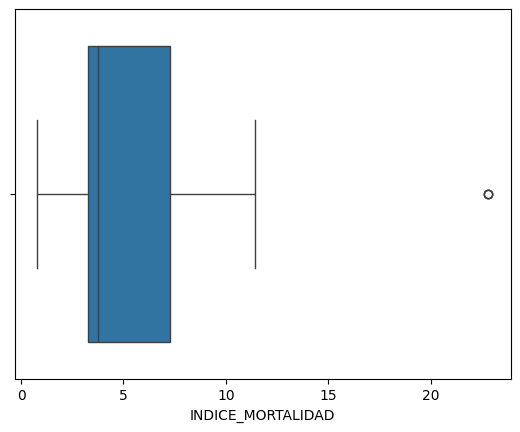

In [10]:
Q1 = tp['INDICE_MORTALIDAD'].quantile(0.25)
Q3 = tp['INDICE_MORTALIDAD'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

def classify_outlier(x):
    if x < lower_bound:
        return 'lower_bound'
    elif x > upper_bound:
        return 'upper_bound'
    else:
        return 'Normal'

tp['Outliers'] = tp['INDICE_MORTALIDAD'].apply(classify_outlier)

print("\nPunto 3: Identificación de Outliers según el método IQR:")
print(tp[['PROVINCIA', 'INDICE_MORTALIDAD', 'Outliers']].to_string(index=False))
sns.boxplot(x='INDICE_MORTALIDAD', data=tp)

Punto 4) Creación de regiones y asignación de provincias

In [11]:
region_map = {
    # Norte
    'JUJUY': 'Norte', 'SALTA': 'Norte', 'TUCUMÁN': 'Norte',
    'CATAMARCA': 'Norte', 'SANTIAGO DEL ESTERO': 'Norte',
    'CHACO': 'Norte', 'FORMOSA': 'Norte', 'MISIONES': 'Norte',
    'CORRIENTES': 'Norte', 'LA RIOJA': 'Norte',
    # Cuyo
    'MENDOZA': 'Cuyo', 'SAN JUAN': 'Cuyo', 'SAN LUIS': 'Cuyo',
    # Central
    'BUENOS AIRES': 'Central', 'CÓRDOBA': 'Central', 'SANTA FE': 'Central',
    'LA PAMPA': 'Central', 'ENTRE RÍOS': 'Central',
    # Patagónica
    'NEUQUÉN': 'Patagónica', 'RÍO NEGRO': 'Patagónica',
    'CHUBUT': 'Patagónica', 'SANTA CRUZ': 'Patagónica',
    'TIERRA DEL FUEGO': 'Patagónica',
    # Ciudad
    'CIUDAD AUTÓNOMA DE BUENOS AIRES': 'Central'
}
tp['REGIÓN'] = tp['PROVINCIA'].str.upper().str.strip().map(region_map)

print("\nPunto 4: Asignación de regiones:")
print(tp[['PROVINCIA', 'REGIÓN']].to_string(index=False))


Punto 4: Asignación de regiones:
                      PROVINCIA     REGIÓN
                   BUENOS AIRES    Central
                      CATAMARCA      Norte
                        CÓRDOBA    Central
                     CORRIENTES      Norte
                          CHACO      Norte
                         CHUBUT Patagónica
                     ENTRE RÍOS    Central
                        FORMOSA      Norte
                          JUJUY      Norte
                       LA PAMPA    Central
                       LA RIOJA      Norte
                        MENDOZA       Cuyo
                       MISIONES      Norte
                        NEUQUÉN Patagónica
                      RÍO NEGRO Patagónica
                          SALTA      Norte
                       SAN JUAN       Cuyo
                       SAN LUIS       Cuyo
                     SANTA CRUZ Patagónica
                       SANTA FE    Central
            SANTIAGO DEL ESTERO      Norte
                    

Punto 5) Gráfico por región

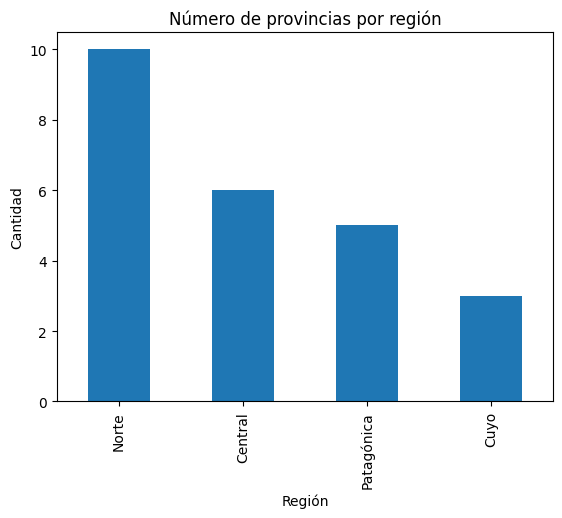

In [12]:
tp['REGIÓN'].value_counts().plot(
    kind='bar', title='Número de provincias por región',
    xlabel='Región', ylabel='Cantidad'
)
plt.show()

Punto 6) Agrupa INDICE_MORTALIDAD por región y graficar

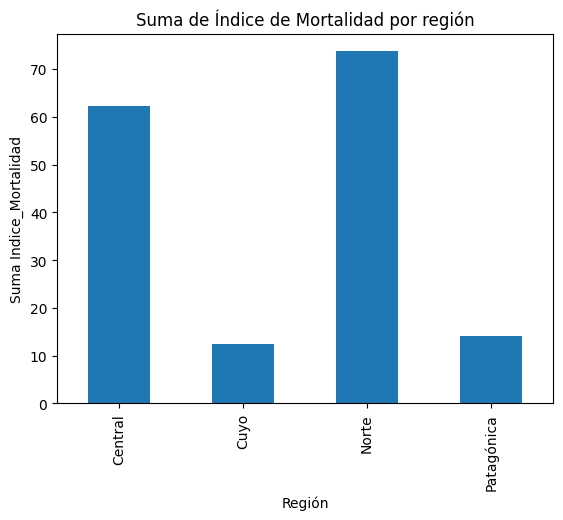

In [13]:
reg_sum = tp.groupby('REGIÓN')['INDICE_MORTALIDAD'].sum()
reg_sum.plot(
    kind='bar', title='Suma de Índice de Mortalidad por región',
    xlabel='Región', ylabel='Suma Indice_Mortalidad'
)
plt.show()


PUNTO 7) Creacion de Columna PROV-REG y calculo de ratio

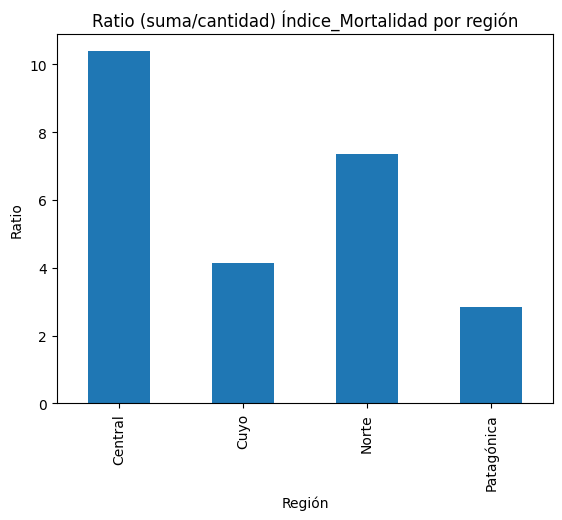

In [14]:

tp['PROV-REG'] = tp['PROVINCIA'] + ' - ' + tp['REGIÓN']


reg_count = tp.groupby('REGIÓN').size()
reg_ratio = reg_sum / reg_count
reg_ratio.plot(
    kind='bar', title='Ratio (suma/cantidad) Índice_Mortalidad por región',
    xlabel='Región', ylabel='Ratio'
)
plt.show()


Punto 9) Filtro por region y pivoteo

In [15]:

filtro = tp[tp['REGIÓN'].isin(['Central', 'Patagónica'])]
print("\nRegiones Central y Patagónica:\n", filtro[['PROVINCIA', 'REGIÓN', 'INDICE_MORTALIDAD']])


pivot = filtro.pivot_table(
    columns='PROVINCIA',
    values='INDICE_MORTALIDAD'
)
print("\nPivot provincias x región:\n", pivot)


Regiones Central y Patagónica:
                           PROVINCIA      REGIÓN  INDICE_MORTALIDAD
0                      BUENOS AIRES     Central              22.80
2                           CÓRDOBA     Central              22.80
5                            CHUBUT  Patagónica               3.00
6                        ENTRE RÍOS     Central               3.10
9                          LA PAMPA     Central               7.20
13                          NEUQUÉN  Patagónica               3.30
14                        RÍO NEGRO  Patagónica               0.80
18                       SANTA CRUZ  Patagónica               3.30
19                         SANTA FE     Central               2.60
22  CIUDAD AUTÓNOMA DE BUENOS AIRES     Central               3.75
23                 TIERRA DEL FUEGO  Patagónica               3.75

Pivot provincias x región:
 PROVINCIA          BUENOS AIRES  CHUBUT  CIUDAD AUTÓNOMA DE BUENOS AIRES  \
INDICE_MORTALIDAD          22.8     3.0                   

Extra: Mapa de ratio de mortalidad or region

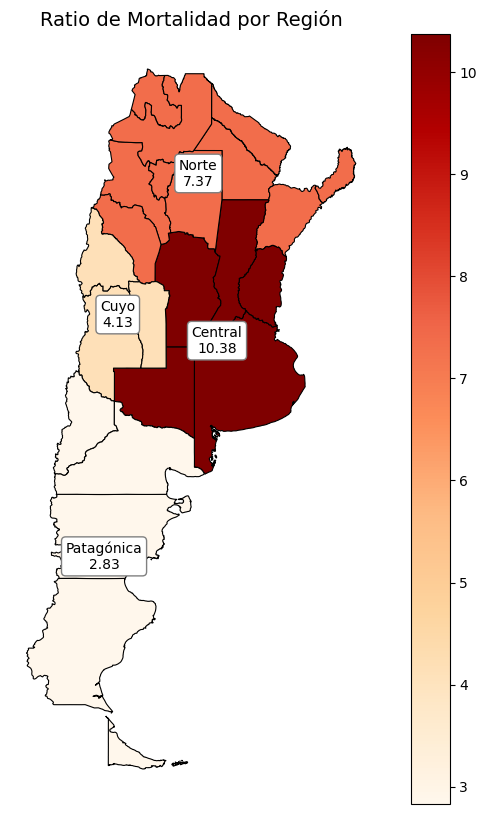

In [16]:

provincias = gpd.read_file("https://gist.github.com/Sinnick4r/ba9db559f8e50f4b14157ef33ca9ba2d/raw/dab1564a11f3792bf80e81362509d006bbef969e/argentina.geojson")


provincias['PROVINCIA'] = provincias['NAME_1'].str.upper()
tp['PROVINCIA'] = tp['PROVINCIA'].str.upper()

ratio_region = tp.groupby('REGIÓN')['INDICE_MORTALIDAD'].sum() / tp.groupby('REGIÓN')['PROVINCIA'].count()
tp['ratio_region'] = tp['REGIÓN'].map(ratio_region)
geo_merged = provincias.merge(tp[['PROVINCIA', 'REGIÓN', 'ratio_region']], on='PROVINCIA', how='left')

geo_proj = geo_merged.to_crs(epsg=3857)
centroides = geo_proj.dissolve(by='REGIÓN').copy()
centroides['geometry'] = centroides.centroid
centroides = centroides.to_crs(epsg=4326)
centroides['ratio_region'] = ratio_region

fig, ax = plt.subplots(figsize=(10, 10))
geo_merged.plot(
    column='ratio_region',
    cmap='OrRd',
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    ax=ax
)
ax.set_title('Ratio de Mortalidad por Región', fontsize=14)
ax.axis('off')

for i, row in centroides.iterrows():
    ax.text(
        row.geometry.x,
        row.geometry.y,
        f"{i}\n{row['ratio_region']:.2f}",
        ha='center',
        va='center',
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3')
    )

plt.show()


Otros gráficos

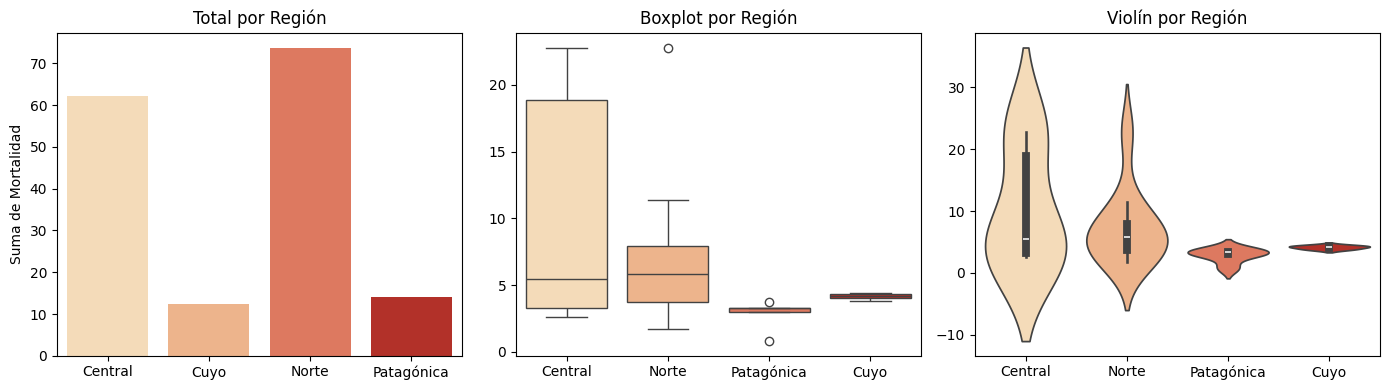

In [17]:
region_sum = tp.groupby('REGIÓN')['INDICE_MORTALIDAD'].sum().reset_index()

plt.figure(figsize=(14, 4))

#  Barras
plt.subplot(1, 3, 1)
sns.barplot(data=region_sum, x='REGIÓN', y='INDICE_MORTALIDAD', hue='REGIÓN', palette='OrRd', legend=False)
plt.title('Total por Región')
plt.ylabel('Suma de Mortalidad')
plt.xlabel('')

# Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(data=tp, x='REGIÓN', y='INDICE_MORTALIDAD', hue='REGIÓN', palette='OrRd', legend=False)
plt.title('Boxplot por Región')
plt.ylabel('')
plt.xlabel('')

# Violinplot
plt.subplot(1, 3, 3)
sns.violinplot(data=tp, x='REGIÓN', y='INDICE_MORTALIDAD', hue='REGIÓN', palette='OrRd', legend=False)
plt.title('Violín por Región')
plt.ylabel('')
plt.xlabel('')

plt.tight_layout()
plt.show()


**Conclusión General**

Del análisis exploratorio realizado sobre la variable Índice de Mortalidad Neonatal, se desprende que existe una importante heterogeneidad entre las provincias argentinas respecto a la misma, evidenciándose tanto regiones con índices bajos como otras con valores considerablemente más altos.

La asignación regional (Norte, Cuyo, Centro y Patagonia) permitió observar que el promedio de mortalidad no se distribuye de forma homogénea:

* La región Norte concentra los valores más altos en promedio.

*  La región Central presenta los valores más bajos.

* Las regiones Cuyo y Patagónica muestran comportamientos intermedios, aunque más cercanos a la media nacional.

Por otor lado, Se detectaron outliers principalmente en las provincias del norte del país, con valores muy por encima del resto, lo cual podría estar asociado a situaciones específicas, aunque no se abordaron variables explicativas en este trabajo.

Finalmente, al incorporar las regiones al análisis y calcular el ratio de mortalidad por cantidad de provincias, se confirmó que el contexto geográfico es un factor de diferenciación clave, incluso cuando no se incluyen variables socioeconómicas o de infraestructura en la comparación.

***Impacto de la Modificación de los Primeros Tres Registros***

La sustitución de los tres primeros valores por 2 * max(Indice_Mortalidad) generó valores atípicos extremos (outliers superiores), que alteraron la distribución general de la variable.

Esto provocó el aumento artificial la media y la desviación estándar de la variable, distorsionando los estadísticos descriptivos globales.

En términos de análisis regional, dos de las provincias modificadas (Buenos Aires y Cordoba) pertenecen a una misma región, epor lo que se infló el ratio regional de esa zona, afectando negativamente las comparaciones entre regiones yhaciendo que el analisis posterior no sea valido